In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def to_lattice_points(d):
    lattice_grid = []
    for x in np.arange(-d/2,d/2,d/10):
        for y in np.arange(-d/2,d/2,d/10):
            if x**2+y**2 <= (d/2)**2:
                lattice_grid.append((x,y))
    return lattice_grid

In [4]:
def dist(lattice_p,screen_p,width):
    return np.sqrt(
                    (lattice_p[0]-screen_p[0])**2+
                    (lattice_p[1]-screen_p[1])**2+
                    width**2
                  )

In [5]:
def amplitude(distance,reference,wavelength):
    return np.cos(2*np.pi*(distance-reference)/wavelength)

In [8]:
width = 50.0
wavelength = 1.0
diameter = 5*wavelength
r_list = []
intensity_list = []

lattice_points = to_lattice_points(diameter)

for r in np.arange(0,4*(width*wavelength/diameter),0.1):
    screen_point = [0,r]
    amplitudeSum = 0

    for lattice_point in lattice_points:
        distance = dist(lattice_point,screen_point,width)
        reference = dist((0,0),screen_point,width)
        amplitudeSum += amplitude(distance,reference,wavelength)

    r_list.append(r)
    intensity_list.append(amplitudeSum**2)

r_list = [i/(width*wavelength/diameter) for i in r_list]


Here, we show a plot of the intensity as a function of distance, where the $x$ axis is $\frac{\lambda D}{d}$

Text(0.5, 1.0, 'Intensity as a Function of Distance')

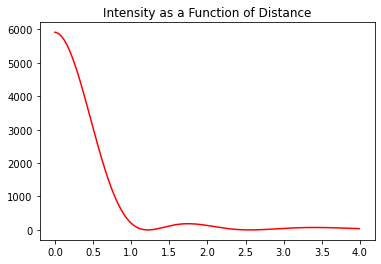

In [9]:
fig = plt.figure()
plt.subplot(111)
plt.plot(r_list,intensity_list,'r')
plt.title('Intensity as a Function of Distance')

We can confirm the coefficient by looking at the minimum point. To increase accuracy, let's increase the separation of the screen and the aperture as well:

In [21]:
width = 50.0
wavelength = 1.0
diameter = 5*wavelength
r_list = []
intensity_list = []

lattice_points = to_lattice_points(diameter)

for r in np.arange(0,1.5*width*wavelength/diameter,0.1):
    screen_point = [0,r]
    amplitudeSum = 0

    for lattice_point in lattice_points:
        distance = dist(lattice_point,screen_point,width)
        reference = dist((0,0),screen_point,width)
        amplitudeSum += amplitude(distance,reference,wavelength)

    r_list.append(r)
    intensity_list.append(amplitudeSum**2)

r_list = [i/(width*wavelength/diameter) for i in r_list]
print(r_list[intensity_list.index(min(intensity_list))])

1.2200000000000002


Let's play around with different values for the width:

Text(0.5, 1.0, 'Intensity as a Function of Distance')

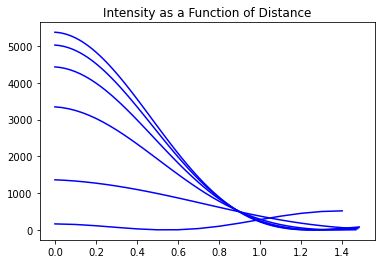

In [26]:
wavelength = 1.0
diameter = 5*wavelength


lattice_points = to_lattice_points(diameter)

fig = plt.figure()
plt.subplot(111)


for width in np.arange(5,35,5):
    r_list = []
    intensity_list = []
    for r in np.arange(0,1.5*width*wavelength/diameter,0.1):
        screen_point = [0,r]
        amplitudeSum = 0

        for lattice_point in lattice_points:
            distance = dist(lattice_point,screen_point,width)
            reference = dist((0,0),screen_point,width)
            amplitudeSum += amplitude(distance,reference,wavelength)

        r_list.append(r)
        intensity_list.append(amplitudeSum**2)

    r_list = [i/(width*wavelength/diameter) for i in r_list]
    plt.plot(r_list,intensity_list,'blue')

plt.title('Intensity as a Function of Distance')


Let's now re-do the task but take into account that the amplitude drops off with the square of the distance.

Text(0.5, 1.0, 'Intensity as a Function of Distance')

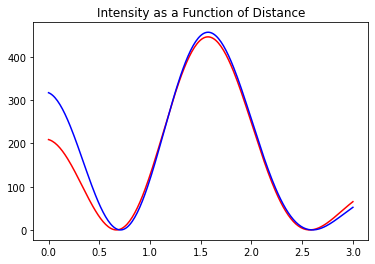

In [40]:
width = 4
wavelength = 1.0
diameter = 5*wavelength
r_list = []
intensity_list1 = []
intensity_list2 = []

lattice_points = to_lattice_points(diameter)

for r in np.arange(0,3*(width*wavelength/diameter),0.01):
    screen_point = [0,r]
    amplitudeSum1 = 0
    amplitudeSum2 = 0

    for lattice_point in lattice_points:
        distance = dist(lattice_point,screen_point,width)
        reference = dist((0,0),screen_point,width)
        amplitudeSum1 += amplitude(distance,reference,wavelength)*(reference/distance)
        amplitudeSum2 += amplitude(distance,reference,wavelength)

    r_list.append(r)
    intensity_list1.append(amplitudeSum1**2)
    intensity_list2.append(amplitudeSum2**2)

r_list = [i/(width*wavelength/diameter) for i in r_list]

fig = plt.figure()
plt.subplot(111)
plt.plot(r_list,intensity_list1,'r')
plt.plot(r_list,intensity_list2,'b')
plt.title('Intensity as a Function of Distance')

In [ ]:
fig = plt.figure()
plt.subplot(111)
plt.plot(r_list,intensity_list,'r')
plt.title('Intensity as a Function of Distance')